In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
data = pd.read_csv(r'C:\Users\paula\OneDrive\Curso\Henry\M6\Proyecto_Integrador\Propuesta 1\BBDD_Hospitalización.csv',sep=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [4]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


## Tratamiento de outliers para "EDAD"

In [5]:
# Encuentra los índices donde EDAD es muy grande
indices_a_eliminar = data[data["EDAD"] > 120].index

# Elimina esas filas del DataFrame
data = data.drop(indices_a_eliminar)

## Tratamiento de nulos

In [6]:
# Filtrar filas donde AGENTE AISLADO sea distinto de "NO"
filtro = data[data["AGENTE AISLADO"] != "NO"]

# Seleccionar las columnas deseadas
trios_valores = filtro[["TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]]

# Mostrar los resultados
trios_valores


,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA
2,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R"
4,HEMOCULTIVO,E.COLI,NO
6,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA"
7,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX..."
10,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA"
11,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX..."
22,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE
23,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE
26,NO,NaN,NO
99,NO,NaN,NO


In [7]:
# Completar "AGENTE AISLADO" con "NO" donde "PATRON DE RESISTENCIA" es "NO"
data.loc[data["TIPO DE CULTIVO"] == "NO", "AGENTE AISLADO"] = "NO"

In [8]:
# Filtrar filas donde AGENTE AISLADO sea distinto de "NO"
filtro = data[data["HOSPITALIZACION"] != "NO"]

# Seleccionar las columnas deseadas
trios_valores = filtro[["HOSPITALIZACION", "DIAS HOSPITALIZACION MQ", "DIAS HOSPITALIZACIÓN UPC"]]

# Mostrar los resultados
trios_valores

,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,SI,2,0
1,SI,5,0
2,SI,4,3
3,SI,5,0
4,SI,4,3
5,SI,3,0
6,SI,3,0
7,SI,2,0
8,SI,4,0
9,SI,3,0


In [9]:
# Completar los nulos en "HOSPITALIZACION" según las condiciones
data["HOSPITALIZACION"] = data["HOSPITALIZACION"].fillna(
    data.apply(
        lambda row: "NO" if row["DIAS HOSPITALIZACION MQ"] == 0 and row["DIAS HOSPITALIZACIÓN UPC"] == 0 else "SI",
        axis=1
    )
)

In [10]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,566.000000,562.000000,566.000000,566.000000,566.000000
mean,63.588339,13.296388,13.000000,0.166078,0.014134
std,7.864683,15.691218,3.927665,0.959709,0.196820
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,12.000000,3.000000


In [11]:
# Calcular la mediana
mediana = data["PSA"].median()
    
# Asignar los valores rellenados al DataFrame original
data["PSA"] = data["PSA"].fillna(mediana)

In [12]:
# Calcular la moda
moda = data["BIOPSIAS PREVIAS"].mode()[0]
    
# Asignar los valores rellenados al DataFrame original
data["BIOPSIAS PREVIAS"] = data["BIOPSIAS PREVIAS"].fillna(moda)

In [13]:
# Calcular la moda
moda = data["VOLUMEN PROSTATICO"].mode()[0]
    
# Asignar los valores rellenados al DataFrame original
data["VOLUMEN PROSTATICO"] = data["VOLUMEN PROSTATICO"].fillna(moda)

In [14]:
# Calcular la moda
moda = data["CUP"].mode()[0]
    
# Asignar los valores rellenados al DataFrame original
data["CUP"] = data["CUP"].fillna(moda)

In [15]:
# Calcular la moda
moda = data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].mode()[0]
    
# Asignar los valores rellenados al DataFrame original
data["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].fillna(moda)

In [16]:
data["ENF. CRONICA PULMONAR OBSTRUCTIVA"].value_counts()

ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          546
SI           12
SI, EPOC      4
SI, ASMA      4
Name: count, dtype: int64

In [17]:
# Filtrar filas donde ENF. CRONICA PULMONAR OBSTRUCTIVA sea distinto de "NO"
filtro = data[data["ENF. CRONICA PULMONAR OBSTRUCTIVA"] != "NO"]

# Seleccionar las columnas deseadas
trios_valores = filtro[["HOSPITALIZACION", "ENF. CRONICA PULMONAR OBSTRUCTIVA"]]

# Mostrar los resultados
trios_valores

,HOSPITALIZACION,ENF. CRONICA PULMONAR OBSTRUCTIVA
26,NO,"SI, EPOC"
27,NO,"SI, EPOC"
28,NO,"SI, EPOC"
29,NO,"SI, EPOC"
30,NO,"SI, ASMA"
31,NO,"SI, ASMA"
32,NO,"SI, ASMA"
33,NO,"SI, ASMA"
34,NO,SI
35,NO,SI


## Procesamiento de la variable "PATRON DE RESISTENCIA"
*(Me faltaría saber qué implica ser multisensible, ya que hay casos con una lista larga de resistencia a antibióticos que tal vez se podrían unificar a "Multisensible")*

In [18]:
# Paso 1: Estandarizar nombres y procesar "PATRON DE RESISTENCIA"
nombres_estandarizados = {
    'AMPI R': 'AMPI',
    'RESISTENTE A AMPI': 'AMPI',
    'GENTA R': 'GENTA',
    'CIPRO R': 'CIPRO',
    'CIPRO Y GENTA': 'CIPRO, GENTA',
    'CIPRO Y CEFEPIME': 'CIPRO, CEFEPIME',
    'SULFA M R': 'SULFA'
}

# Dividir combinaciones en listas o dejar "NO" y "MULTI SENSIBLE" como están
data["PATRON DE RESISTENCIA"] = data["PATRON DE RESISTENCIA"].apply(
    lambda x: x.split(',') if isinstance(x, str) and x not in ["NO", "MULTI SENSIBLE"] else x
)

# Aplicar mapeo de nombres en listas
data["PATRON DE RESISTENCIA"] = data["PATRON DE RESISTENCIA"].apply(
    lambda x: [nombres_estandarizados.get(antibiotico.strip(), antibiotico.strip()) for antibiotico in x]
    if isinstance(x, list) else x
)

# Convertir listas a cadenas en la columna "PATRON DE RESISTENCIA"
data["PATRON DE RESISTENCIA"] = data["PATRON DE RESISTENCIA"].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

## Procesamiento de variables PROFILAXIS y BIOPSIA
(quitar los espacios y unificar los nombres)

In [19]:
# Quitar espacios adicionales al inicio y al final de las cadenas en las columnas especificadas
columnas_a_limpiar = ["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS", "BIOPSIA"]

for columna in columnas_a_limpiar:
    data[columna] = data[columna].str.strip()

# Unificar FLUOROQUINOLONA_AMINOGLICOSIDO
data["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"] = data["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"].replace(
    'FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO'
)

## Transformación de las variables categóricas a numéricas

In [20]:
le = preprocessing.LabelEncoder() 
data['DIABETES'] = le.fit_transform(data['DIABETES'])
data['HOSPITALIZACIÓN ULTIMO MES'] = le.fit_transform(data['HOSPITALIZACIÓN ULTIMO MES'])
data['BIOPSIAS PREVIAS'] = le.fit_transform(data['BIOPSIAS PREVIAS'])
data['VOLUMEN PROSTATICO'] = le.fit_transform(data['VOLUMEN PROSTATICO'])
data['CUP'] = le.fit_transform(data['CUP'])
data['FIEBRE'] = le.fit_transform(data['FIEBRE'])
data['ITU'] = le.fit_transform(data['ITU'])
data['HOSPITALIZACION'] = le.fit_transform(data['HOSPITALIZACION'])
data['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'] = le.fit_transform(data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'])
data['BIOPSIA'] = le.fit_transform(data['BIOPSIA'])
data['PATRON DE RESISTENCIA'] = le.fit_transform(data['PATRON DE RESISTENCIA'])


## Procesamiento de la variable "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"

Como el número máximo de días postbiopsia esperado es de 30, aquellos pacientes que no se les presentó una complicación infecciosa, reemplazo el "NO", por un número por fuera de este rango (en este caso 50)

In [21]:
data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"] = data[
    "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"
].replace("NO", 50)

# Convertir a tipo numérico
data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"] = pd.to_numeric(
    data["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"], errors="coerce"
)


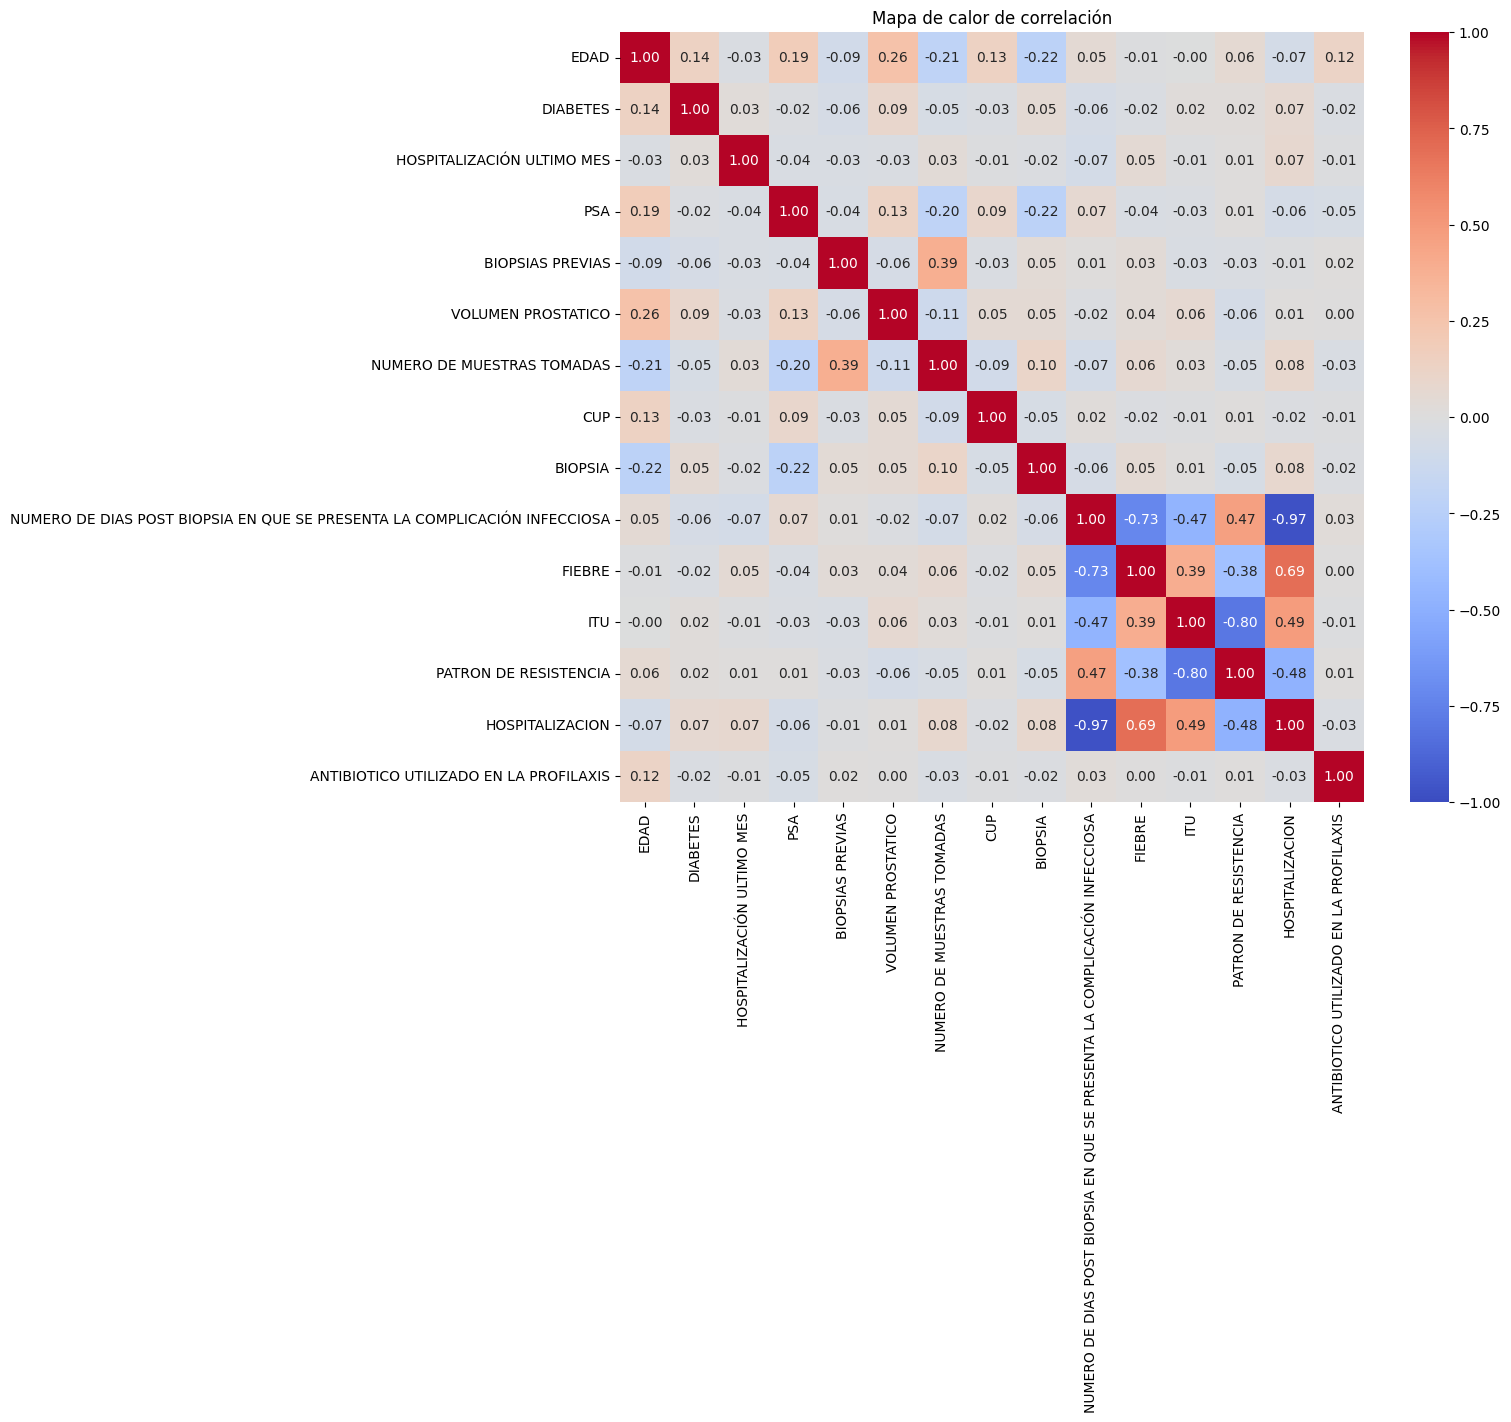

In [27]:
# Seleccionar solo columnas numéricas
variables_numericas = data.select_dtypes(include=["float64", "int64", "int32"]).columns

# Calcular la matriz de correlación
correlacion = data[variables_numericas].corr()

# Eliminar filas y columnas completamente NaN
correlacion = correlacion.dropna(how="all", axis=0)
correlacion = correlacion.dropna(how="all", axis=1)

# Crear el mapa de calor con correlaciones fuertes
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Mapa de calor de correlación")
plt.show()

In [23]:
variables_numericas.to_list()

['EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'NUMERO DE MUESTRAS TOMADAS',
 'CUP',
 'BIOPSIA',
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
 'FIEBRE',
 'ITU',
 'PATRON DE RESISTENCIA',
 'HOSPITALIZACION',
 'DIAS HOSPITALIZACION MQ',
 'DIAS HOSPITALIZACIÓN UPC',
 'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS']

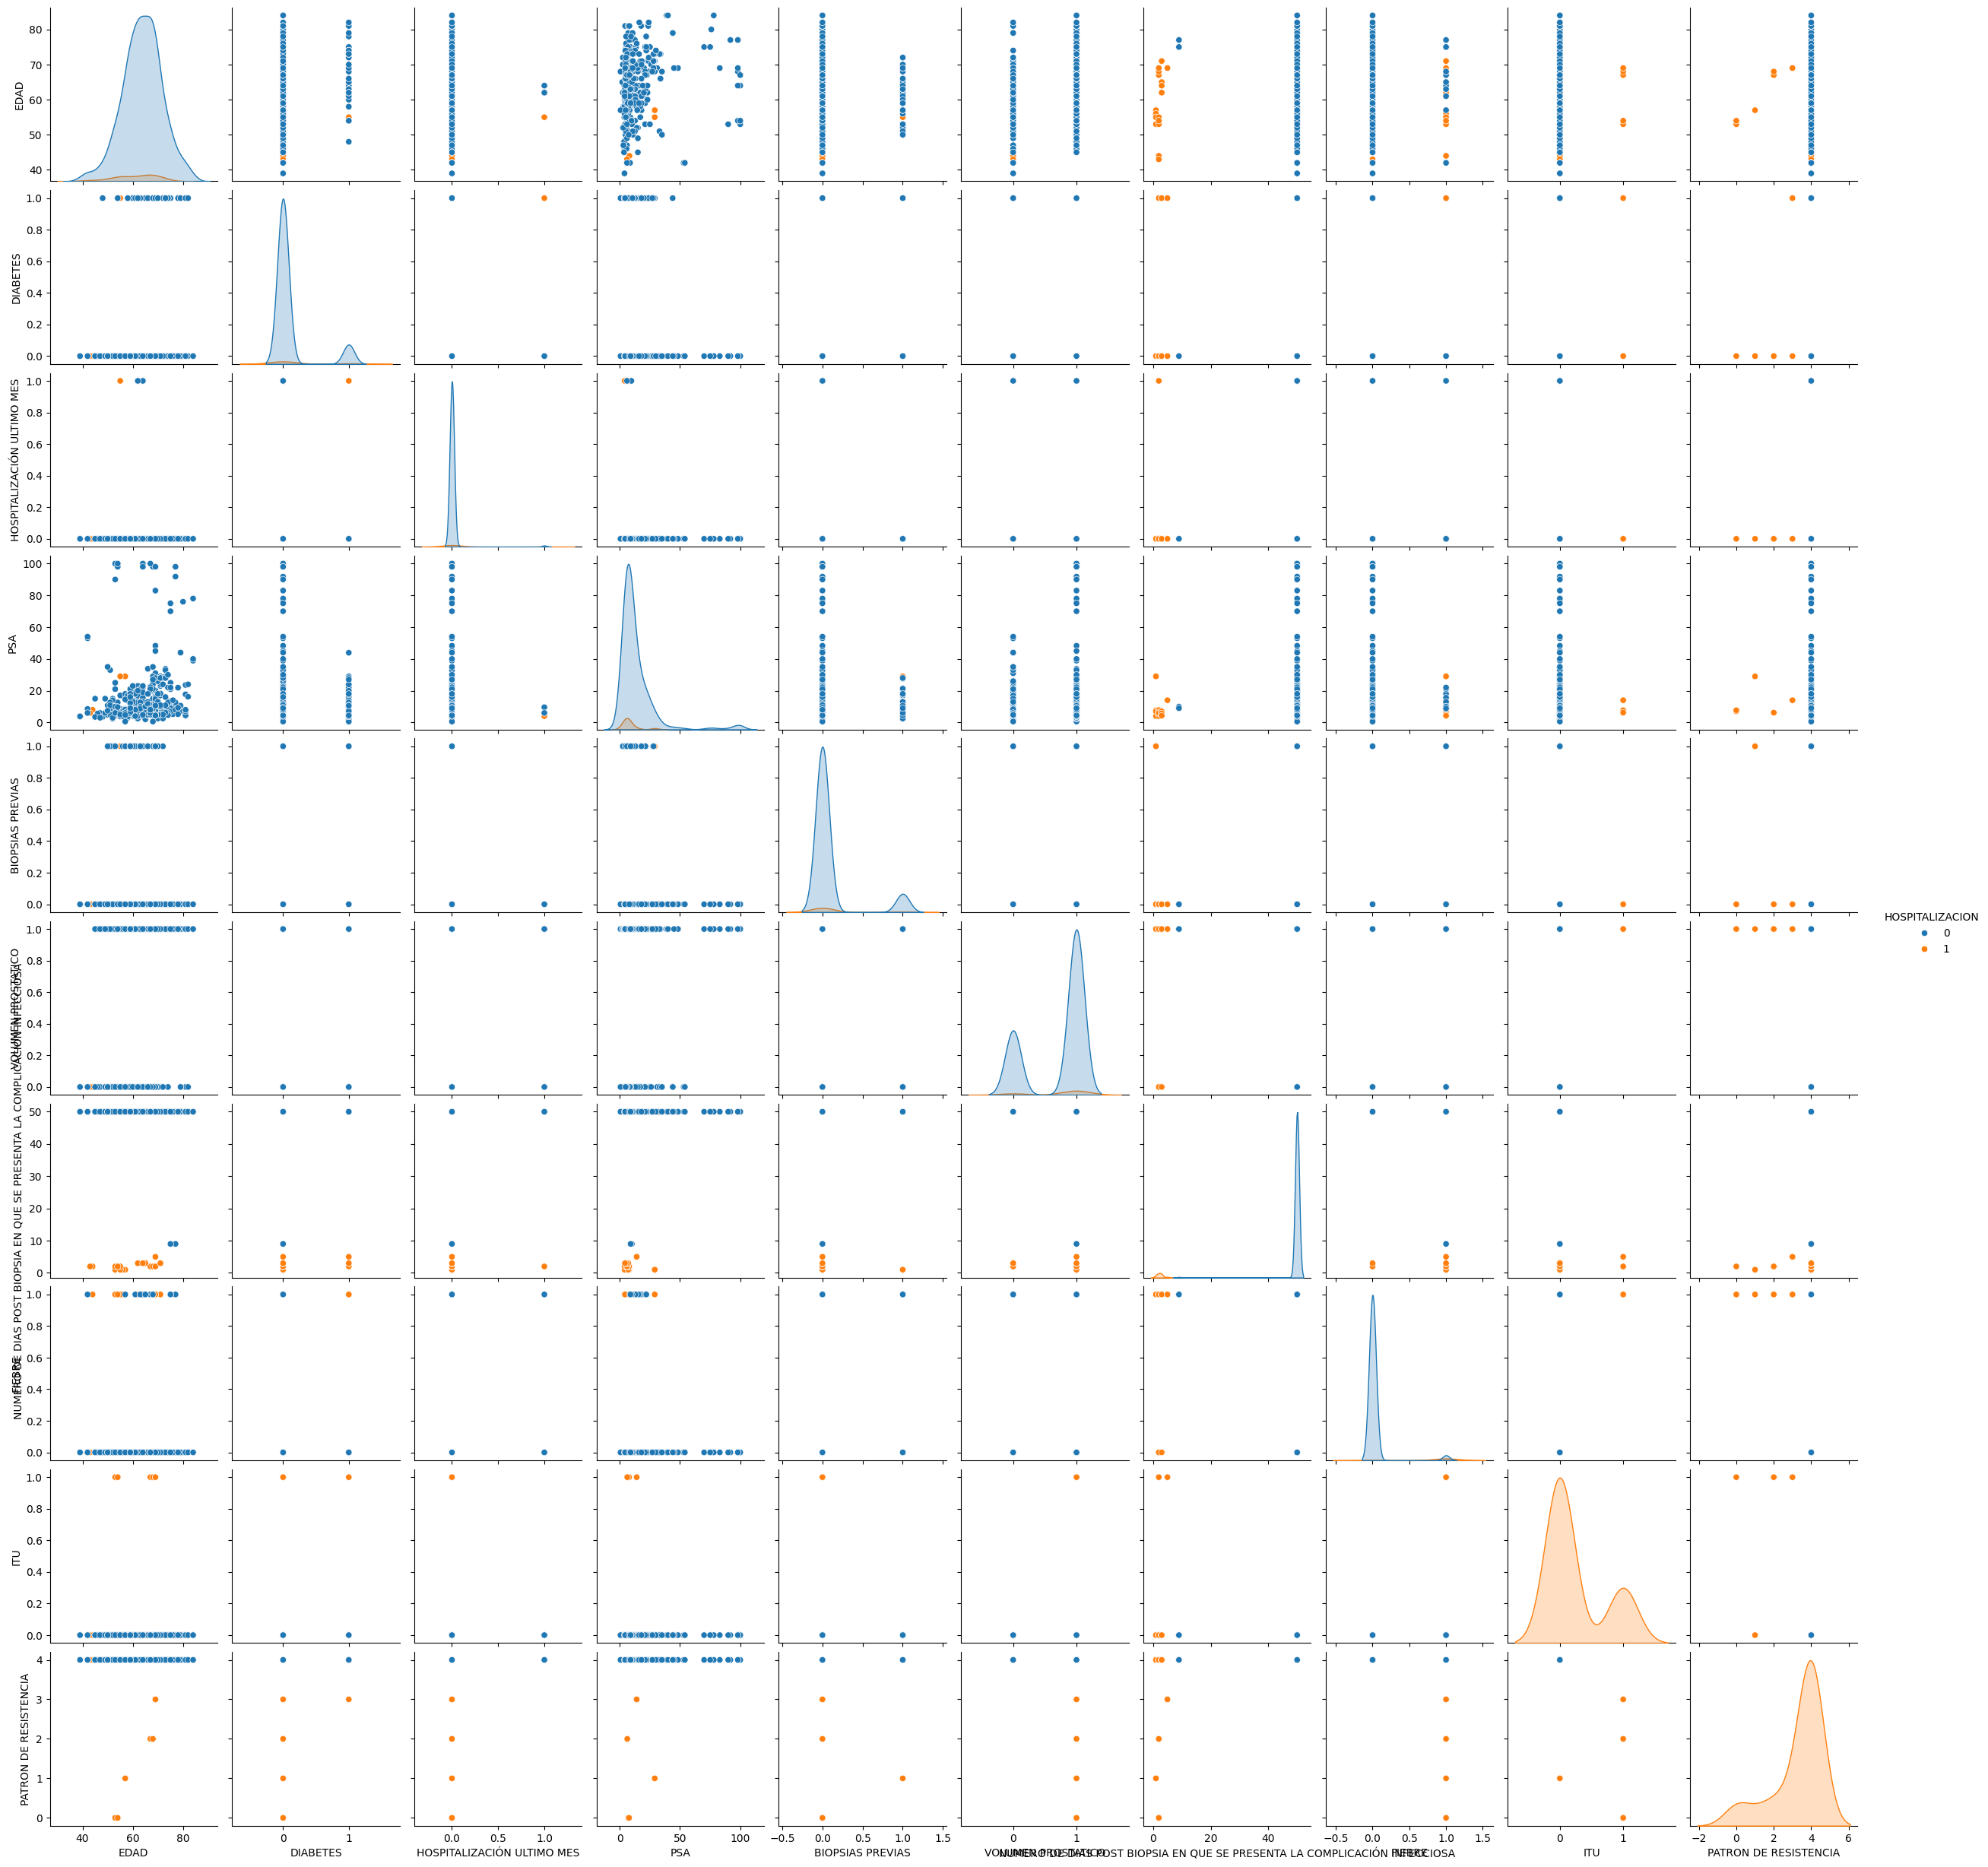

In [24]:
sns.pairplot(data[['EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
 'FIEBRE',
 'ITU',
 'PATRON DE RESISTENCIA',
 'HOSPITALIZACION']], hue="HOSPITALIZACION")

In [25]:
data = data.drop(columns = ['TIPO DE CULTIVO','AGENTE AISLADO','ENF. CRONICA PULMONAR OBSTRUCTIVA', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'], errors='ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 567
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       566 non-null    int64  
 1   DIABETES                                                                   566 non-null    int32  
 2   HOSPITALIZACIÓN ULTIMO MES                                                 566 non-null    int32  
 3   PSA                                                                        566 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    int32  
 5   VOLUMEN PROSTATICO                                                         566 non-null    int32  
 6   NUMERO DE MUESTRAS TOMADAS                                     

In [26]:
data.to_csv("BBDD_Hospitalización_ETL.csv")